<a href="https://colab.research.google.com/github/SyedMustafaMoiz/MBAN-Practice/blob/main/Glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. **Importing Necessary Libraries**:
# We start by importing the necessary modules from TensorFlow/Keras and other libraries required for model building.
# - `Conv3D`, `MaxPooling3D` are used for processing 3D image data.
# - `Dense`, `Flatten`, and `Concatenate` are used for building fully connected layers and merging different inputs (image and tabular).
# - `Model` is the Keras functional API to define a custom model architecture.

import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

from google.colab import drive
import zipfile
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Conv3D, MaxPooling3D, Concatenate, GlobalAveragePooling3D
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, Precision, Recall
import tensorflow as tf  # Import TensorFlow

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/dataset.zip'

# Directory where you want to extract the contents
extraction_dir = '/content/dataset/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

print("Before extraction, the contents of the folder are:")
print(os.listdir(extraction_dir))

Before extraction, the contents of the folder are:
[]


In [ ]:
# Define paths for 'RNFLT' and 'Bscan' directories after extraction
rnflt_folder_path = os.path.join(extraction_dir, 'RNFLT')
bscan_folder_path = os.path.join(extraction_dir, 'Bscan')

# Extract the ZIP file to the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List contents of the extraction directory after extraction to confirm the files
extracted_files = os.listdir(extraction_dir)

# List files in the RNFLT and Bscan folders
rnflt_files = os.listdir(rnflt_folder_path)
bscan_files = os.listdir(bscan_folder_path)

# Verify the number of files in both folders
print(f"Number of RNFLT files: {len(rnflt_files)}")
print(f"Number of Bscan files: {len(bscan_files)}")

Number of RNFLT files: 1000
Number of Bscan files: 1000


In [ ]:
# 2. **Loading Bscan and RNFLT Data**:
# Here, you load a sample OCT Bscan file and RNFLT data.
#  The .npz files contain structured data including Bscan image data and other metadata like glaucoma status.
#  You inspect the structure of the loaded files by printing the keys, and then extract the necessary image and tabular data.
# Load a sample Bscan file
sample_bscan_file = os.path.join(bscan_folder_path, 'data_0001.npz')
bscan_data = np.load(sample_bscan_file)
print(f"Sample Bscan file keys: {list(bscan_data.keys())}")

# Load a sample RNFLT file
sample_rnflt_file = os.path.join(rnflt_folder_path, 'data_0001.npz')
rnflt_data = np.load(sample_rnflt_file)
print(f"Sample RNFLT file keys: {list(rnflt_data.keys())}")

Sample Bscan file keys: ['bscans']
Sample RNFLT file keys: ['rnflt', 'progression', 'glaucoma', 'md', 'tds', 'age', 'gender', 'race', 'hispanic']


In [ ]:
bscan_image_data = bscan_data['bscans']
print(f"Bscan shape: {bscan_image_data.shape}")
print(f"Bscan type: {type(bscan_image_data)}")

Bscan shape: (200, 200, 300)
Bscan type: <class 'numpy.ndarray'>


In [ ]:
rnflt_rnflt = rnflt_data['rnflt']
print(f"RNFLT shape: {rnflt_rnflt.shape}")
print(f"RNFLT type: {type(rnflt_rnflt)}")

rnflt_progression = rnflt_data['progression']
print(f"Progression shape: {rnflt_progression.shape}")
print(f"Progression type: {type(rnflt_progression)}")

RNFLT shape: (225, 225)
RNFLT type: <class 'numpy.ndarray'>
Progression shape: (6,)
Progression type: <class 'numpy.ndarray'>


Sample Bscan file keys: ['bscans']


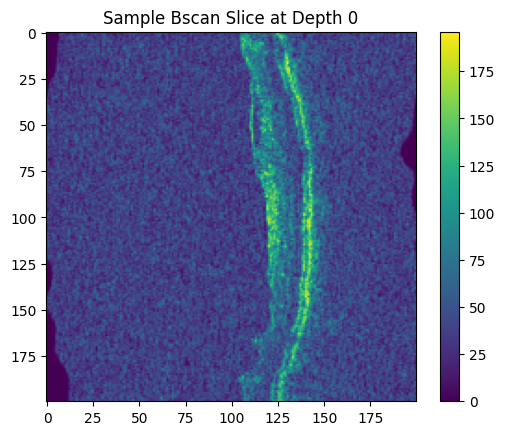

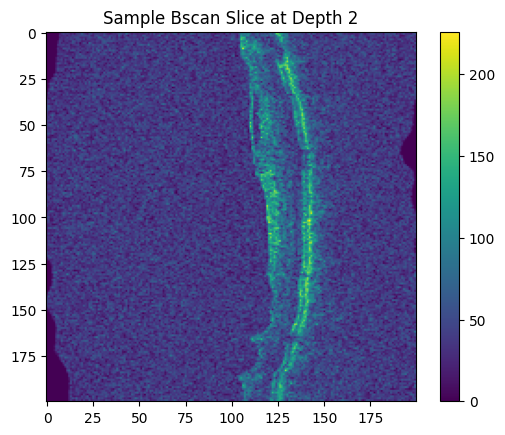

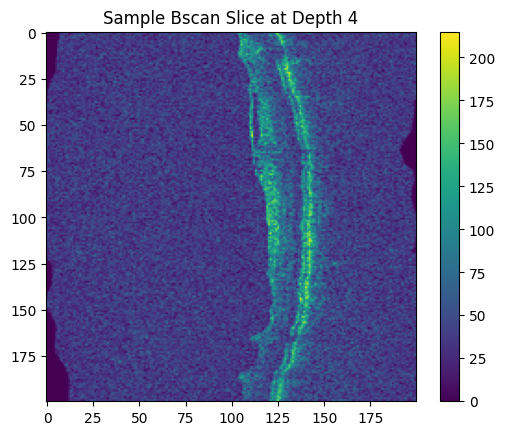

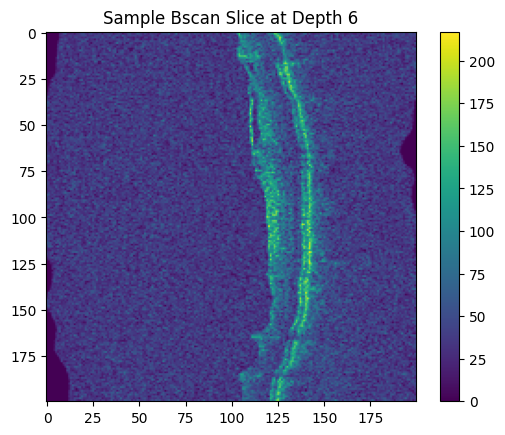

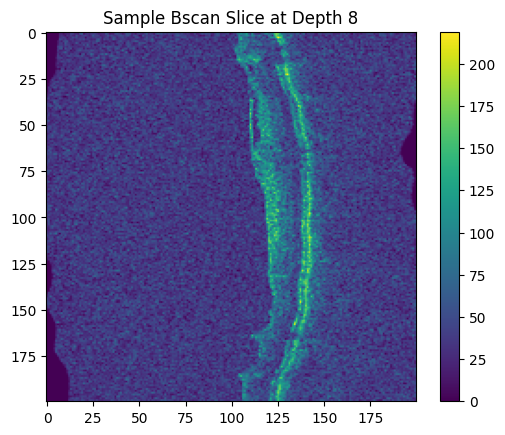

In [ ]:
# Load a sample Bscan file
sample_bscan_file = os.path.join(bscan_folder_path, 'data_0001.npz')
bscan_data = np.load(sample_bscan_file)

# Display the keys to check the structure
print(f"Sample Bscan file keys: {list(bscan_data.keys())}")

# Extract the Bscan image data (assuming 'bscans' is the key)
if 'bscans' in bscan_data:
    bscan_image_data = bscan_data['bscans']

    # Define the range of slices you want to visualize (from slice 0 to 299)
    start_slice = 0
    end_slice = 10  # You can adjust this range
    step_size = 2   # How many slices to skip

    # Loop through and display each slice within the specified range
    for slice_idx in range(start_slice, end_slice, step_size):
        plt.imshow(bscan_image_data[:, :, slice_idx]) #, cmap='gray')
        plt.colorbar()
        plt.title(f"Sample Bscan Slice at Depth {slice_idx}")
        plt.show()
else:
    print("Key 'bscans' not found in the Bscan file.")

In [ ]:
pixel_value = bscan_image_data[100, 100, slice_idx]
print(f"Pixel value at (100, 100): {pixel_value}")

Pixel value at (100, 100): 18


In [ ]:
# Load a sample RNFLT file
sample_rnflt_file = os.path.join(rnflt_folder_path, 'data_0001.npz')
rnflt_data = np.load(sample_rnflt_file)

# Display the keys to check the structure
print(f"Sample RNFLT file keys: {list(rnflt_data.keys())}")

# Extract and print metadata for inspection
if 'rnflt' in rnflt_data:
    rnflt_image_data = rnflt_data['rnflt']
    print(f"Sample RNFLT data shape: {rnflt_image_data.shape}")
    print(f"Sample RNFLT data: {rnflt_image_data}")
else:
    print("Key 'rnflt' not found in the RNFLT file.")

# Example for other metadata (progression, glaucoma, etc.)
if 'progression' in rnflt_data:
    print(f"Progression data: {rnflt_data['progression']}")
if 'glaucoma' in rnflt_data:
    print(f"Glaucoma data: {rnflt_data['glaucoma']}")

Sample RNFLT file keys: ['rnflt', 'progression', 'glaucoma', 'md', 'tds', 'age', 'gender', 'race', 'hispanic']
Sample RNFLT data shape: (225, 225)
Sample RNFLT data: [[ 0.          0.          1.59090909 ...  6.36363636  1.59090909
   0.        ]
 [ 0.          0.          3.18181818 ... -1.          3.18181818
   0.        ]
 [ 0.          0.          3.18181818 ... -1.          3.18181818
   0.        ]
 ...
 [ 0.          0.          3.18181818 ... -1.          3.18181818
   0.        ]
 [ 0.          0.          1.59090909 ...  4.77272727  1.59090909
   0.        ]
 [ 0.          0.          0.         ...  1.59090909  0.
   0.        ]]
Progression data: ['0' '0' '0' '0' '0' '1']
Glaucoma data: 1


In [ ]:
image_height = 200  # Height of the image (rows)
image_width = 200   # Width of the image (columns)
num_channels = 1    # 1 for grayscale, 3 for RGB, will have to change if it turns out images in colour
num_tabular_features = 9  # features in tabular dataset

In [ ]:
# 3. **Model Architecture:**
# You defined a model to perform binary classification for glaucoma detection using both image (Bscan or RNFLT) and clinical features (tabular data).
# The model consists of:
# - **3D Convolutional Layers (Conv3D)**: These are used to process 3D image data (OCT scan), where the depth dimension of the images is crucial (as you have 300 slices).
# - **MaxPooling3D**: These layers down-sample the feature maps to reduce spatial dimensions after convolution.
# - **Global Average Pooling (GlobalAveragePooling3D)**: This is applied to reduce the 3D features to a fixed-size vector by averaging over spatial dimensions, helping with model generalization.
# - **Dense Layers**: These process the tabular data and also combine it with the image features for final classification.

# Inputs: Image and tabular data
image_input = Input(shape=(image_height, image_width, 300, num_channels))  # Shape of the input image: (height, width, depth, channels) (200, 200, 300, 1)

# 4. **Image Data Processing (3D Convolution)**:
# The 3D convolution is applied to capture spatial and depth-related features in the OCT Bscan data.
# - Conv3D layers process the 3D images with filters to capture local spatial patterns.
# - MaxPooling3D reduces the spatial dimensions progressively, while Conv3D keeps learning depth-related patterns.

x = Conv3D(16, (3, 3, 3), activation='relu')(image_input)  # Fewer filters
x = MaxPooling3D(pool_size=(2, 2, 2))(x)  # Max pooling to reduce spatial size

# 5. **Additional Conv3D and MaxPooling**:
# After the first Conv3D block, we apply another Conv3D layer with more filters to capture more complex patterns.
# After pooling, the image features are downsized in both spatial and depth dimensions.

x = Conv3D(32, (3, 3, 3), activation='relu')(x)  # More filters after pooling
x = MaxPooling3D(pool_size=(2, 2, 2))(x)

# Apply Global Average Pooling to reduce dimensions before the dense layers
x = GlobalAveragePooling3D()(x)  # Reduces the tensor to a single vector

# Input for tabular data (clinical features)
tabular_input = Input(shape=(num_tabular_features,))  # Tabular data input shape

# 6. **Tabular Data Processing**:
# The tabular input (clinical data) goes through dense layers
# to learn a rich representation of these features.
# - The `Dense` layers apply a fully connected structure to
# process tabular data, and the activations help capture nonlinearities.
# Dense layers for tabular data processing
y = Dense(64, activation='relu')(tabular_input)
y = Dense(32, activation='relu')(y)

# 7. **Feature Fusion**:
# We concatenate the image features (processed by Conv3D
# and MaxPooling3D) and the tabular features (processed by Dense layers).
# - The features are fused into a single vector before feeding
# them to the final dense layer.
# Merge image and tabular data
merged = Concatenate()([x, y])

# 8. **Output Layer**:
# The final dense layer has a single unit with a sigmoid
# activation function to perform binary classification (glaucoma detection).
# Final dense layers for prediction (binary classification for glaucoma detection)
output = Dense(1, activation='sigmoid')(merged)

# 9. **Compile the Model**:
# The model is compiled with the Adam optimizer,
# binary cross-entropy loss function
# Build and compile the model
model = Model(inputs=[image_input, tabular_input], outputs=output)
# Compile the model with multiple metrics including AUC, Precision, Recall, and F1-Score
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(), Precision(), Recall()])

# Summary of the model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 300, 1)]   0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 198, 198, 298, 16)    448       ['input_1[0][0]']             
                                                                                                  
 max_pooling3d (MaxPooling3  (None, 99, 99, 149, 16)      0         ['conv3d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv3d_1 (Conv3D)           (None, 97, 97, 147, 32)      13856     ['max_pooling3d[0][0]']   

In [ ]:
# Now we first check the labels

# Initialize lists to store image data and labels
image_data = []
labels = []

# Loop through the RNFLT files
for file in os.listdir(rnflt_folder_path):
    if file.endswith('.npz'):
        # Load the RNFLT file
        rnflt_file_path = os.path.join(rnflt_folder_path, file)
        rnflt_data = np.load(rnflt_file_path)

        # Get the glaucoma label)
        if 'glaucoma' in rnflt_data:
            glaucoma_label = rnflt_data['glaucoma']

            # Load the corresponding Bscan image (ensure the Bscan and RNFLT file names match)
            bscan_file_path = os.path.join(bscan_folder_path, file)
            if os.path.exists(bscan_file_path):
                bscan_data = np.load(bscan_file_path)
                bscan_image_data = bscan_data['bscans']

                # Append image data and the corresponding glaucoma label
                image_data.append(bscan_image_data)
                labels.append(glaucoma_label)

# Convert lists to numpy arrays for easier handling later
image_data = np.array(image_data)
labels = np.array(labels)

# Check how many samples have glaucoma (label == 1) and how many do not (label == 0)
num_glaucoma = np.sum(labels == 1)
num_no_glaucoma = np.sum(labels == 0)

print(f"Number of samples with glaucoma: {num_glaucoma}")
print(f"Number of samples with no glaucoma: {num_no_glaucoma}")


Number of samples with glaucoma: 443
Number of samples with no glaucoma: 557


In [ ]:
# now I will check my image pixel range, this is so I can normalize
min_pixel_value = np.min(image_data)
max_pixel_value = np.max(image_data)

print(f"Minimum pixel value: {min_pixel_value}")
print(f"Maximum pixel value: {max_pixel_value}")

Minimum pixel value: 0
Maximum pixel value: 255


In [ ]:
# normalizing
# i have converted to float since its easier to run
# i am normalizing so the data converges more easily and the gradients don't explode
# i am doing this in batches because of the data size
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data_generator = datagen.flow(image_data, labels, batch_size=batch_size)
for batch_images, batch_labels in train_data_generator:
    print(batch_images.shape)
    print(batch_labels.shape)
    break

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1000, 200, 200, 300) (300 channels).
  warnings.warn(


(32, 200, 200, 300)
(32,)


In [ ]:
# Initialize an empty list to hold each patient's data
tabular_data = []

# This loop should populate tabular_data with the relevant patient information
for file in os.listdir(rnflt_folder_path):
    if file.endswith('.npz'):
        # Load each RNFLT file
        rnflt_file_path = os.path.join(rnflt_folder_path, file)
        rnflt_data = np.load(rnflt_file_path, allow_pickle=True)

        # Extract the required fields
        age = rnflt_data['age']
        gender = rnflt_data['gender']
        race = rnflt_data['race']
        hispanic = rnflt_data['hispanic']
        md = rnflt_data['md']
        tds = rnflt_data['tds']

        # Append data as a list
        tabular_data.append([age, gender, race, hispanic, md, tds])

# Define columns and create the DataFrame
columns = ['age', 'gender', 'race', 'hispanic', 'md', 'tds']
tabular_df = pd.DataFrame(tabular_data, columns=columns)
print(tabular_df.head())

     age  gender                       race hispanic     md  \
0  59.27  female                      White       no  -0.49   
1  57.72  female                      White       no   0.43   
2  40.25    male  Black or African American       no  -0.11   
3  78.07    male                      Asian       no  -4.38   
4   70.0    male                      White       no    0.3   

                                                 tds  
0  [-3.0, -1.0, 1.0, 0.0, 1.0, -2.0, -1.0, 0.0, 0...  
1  [3.0, 2.0, 2.0, 4.0, -1.0, 2.0, 2.0, 2.0, 2.0,...  
2  [0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0, 0.0, 0.0...  
3  [-6.0, -11.0, -10.0, -15.0, -7.0, -6.0, -6.0, ...  
4  [-1.0, 2.0, -1.0, 1.0, 0.0, -1.0, -1.0, 0.0, 0...  


In [ ]:
# Flatten columns if necessary
tabular_df['race'] = tabular_df['race'].apply(lambda x: x[0] if isinstance(x, list) else x)
tabular_df['gender'] = tabular_df['gender'].apply(lambda x: x[0] if isinstance(x, list) else x)
tabular_df['hispanic'] = tabular_df['hispanic'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Apply one-hot encoding to the categorical columns (gender, race, hispanic)
tabular_df = pd.get_dummies(tabular_df, columns=['gender', 'race', 'hispanic'])

# Convert boolean columns to integers
boolean_columns = ['gender_female', 'gender_male', 'race_Asian', 'race_Black or African American',
                   'race_White', 'hispanic_NA', 'hispanic_no', 'hispanic_yes']
for col in boolean_columns:
    tabular_df[col] = tabular_df[col].astype(int)

# Check the updated dataframe
print(tabular_df.head())

     age     md                                                tds  \
0  59.27  -0.49  [-3.0, -1.0, 1.0, 0.0, 1.0, -2.0, -1.0, 0.0, 0...   
1  57.72   0.43  [3.0, 2.0, 2.0, 4.0, -1.0, 2.0, 2.0, 2.0, 2.0,...   
2  40.25  -0.11  [0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0, 0.0, 0.0...   
3  78.07  -4.38  [-6.0, -11.0, -10.0, -15.0, -7.0, -6.0, -6.0, ...   
4   70.0    0.3  [-1.0, 2.0, -1.0, 1.0, 0.0, -1.0, -1.0, 0.0, 0...   

   gender_female  gender_male  race_Asian  race_Black or African American  \
0              1            0           0                               0   
1              1            0           0                               0   
2              0            1           0                               1   
3              0            1           1                               0   
4              0            1           0                               0   

   race_White  hispanic_NA  hispanic_no  hispanic_yes  
0           1            0            1             0  
1   

In [ ]:
'''# Flatten 'tds' into separate columns
tds_df = pd.DataFrame(tabular_df['tds'].to_list(), columns=[f'tds_{i+1}' for i in range(52)])

# Concatenate the new flattened columns with the rest of the DataFrame, removing the original 'tds' column
tabular_df = pd.concat([tabular_df.drop(columns=['tds']), tds_df], axis=1)

# Check the result to make sure 'tds_*' columns exist
print(tabular_df.columns)'''

"# Flatten 'tds' into separate columns\ntds_df = pd.DataFrame(tabular_df['tds'].to_list(), columns=[f'tds_{i+1}' for i in range(52)])\n\n# Concatenate the new flattened columns with the rest of the DataFrame, removing the original 'tds' column\ntabular_df = pd.concat([tabular_df.drop(columns=['tds']), tds_df], axis=1)\n\n# Check the result to make sure 'tds_*' columns exist\nprint(tabular_df.columns)"

In [ ]:
# data augmentation helps training
# this involves rotating the images, moving them around, so the model can learn
# to still recognize them

# Create the ImageDataGenerator for image augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for new pixels
)

# Augment the image data
train_data_generator = datagen.flow(image_data, labels, batch_size=batch_size)

# Function to add Gaussian noise to tabular data (only for a few columns)
def augment_tabular_data(tabular_data):
    # Add noise to only a few selected columns (e.g., 'age', 'md') for now
    numerical_columns = ['age', 'md']  # Only augment 'age' and 'md' for simplicity

    # Add noise to these columns
    noise = np.random.normal(0, 0.1, tabular_data[numerical_columns].shape)  # Adding noise
    augmented_data = tabular_data.copy()  # Make a copy of the original data to avoid modifying the original
    augmented_data[numerical_columns] += noise  # Add noise to the numerical columns

    return augmented_data

# Augment the tabular data (just 'age' and 'md' for now)
tabular_data = augment_tabular_data(tabular_df)
print(tabular_data.head())

         age        md                                                tds  \
0  59.426706  -0.55817  [-3.0, -1.0, 1.0, 0.0, 1.0, -2.0, -1.0, 0.0, 0...   
1  57.555554  0.491037  [3.0, 2.0, 2.0, 4.0, -1.0, 2.0, 2.0, 2.0, 2.0,...   
2  40.325741 -0.140828  [0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0, 0.0, 0.0...   
3  77.912512 -4.431608  [-6.0, -11.0, -10.0, -15.0, -7.0, -6.0, -6.0, ...   
4  70.105298  0.248108  [-1.0, 2.0, -1.0, 1.0, 0.0, -1.0, -1.0, 0.0, 0...   

   gender_female  gender_male  race_Asian  race_Black or African American  \
0              1            0           0                               0   
1              1            0           0                               0   
2              0            1           0                               1   
3              0            1           1                               0   
4              0            1           0                               0   

   race_White  hispanic_NA  hispanic_no  hispanic_yes  
0           1     

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1000, 200, 200, 300) (300 channels).
  warnings.warn(


In [ ]:
# Combined generator that yields both augmented image and tabular data
def combined_data_generator(image_data, tabular_data, batch_size):
    # Get the image generator for augmentation
    image_flow = datagen.flow(image_data, batch_size=batch_size, shuffle=True)

    while True:  # Infinite loop for batch generation
        image_batch = next(image_flow)  # Fetch image batch

        # Randomly shuffle the tabular data along with the image batch (without converting to NumPy)
        tabular_batch = tabular_data.sample(n=batch_size, replace=False)

        # Augment the tabular data with noise
        augmented_tabular_batch = augment_tabular_data(tabular_batch)

        # Yield the augmented image batch and augmented tabular batch together
        yield image_batch, augmented_tabular_batch

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Expand 'tds' by converting the lists into separate columns (52 TDS values)
tds_columns = pd.DataFrame(tabular_df['tds'].to_list(), columns=[f'tds_{i+1}' for i in range(52)])

tabular_df = pd.concat([tabular_df.drop(columns=['tds']), tds_columns], axis=1)

# Drop the 'progression' column as it is not needed for glaucoma detection
#tabular_df = tabular_df.drop(columns=['progression'])

print(tabular_df.head())

     age     md  gender_female  gender_male  race_Asian  \
0  59.27  -0.49              1            0           0   
1  57.72   0.43              1            0           0   
2  40.25  -0.11              0            1           0   
3  78.07  -4.38              0            1           1   
4   70.0    0.3              0            1           0   

   race_Black or African American  race_White  hispanic_NA  hispanic_no  \
0                               0           1            0            1   
1                               0           1            0            1   
2                               1           0            0            1   
3                               0           0            0            1   
4                               0           1            0            1   

   hispanic_yes  ...  tds_43  tds_44  tds_45  tds_46  tds_47  tds_48  tds_49  \
0             0  ...    -5.0    -1.0    -1.0     0.0    -1.0     0.0    -2.0   
1             0  ...     2.0     1

In [ ]:
numerical_columns = ['age', 'md'] + [f'tds_{i+1}' for i in range(52)]
scaler = StandardScaler()
tabular_df[numerical_columns] = scaler.fit_transform(tabular_df[numerical_columns])

print(tabular_df.head())

        age        md  gender_female  gender_male  race_Asian  \
0 -0.291502  0.583378              1            0           0   
1 -0.407464  0.759738              1            0           0   
2 -1.714463  0.656222              0            1           0   
3  1.115000 -0.162316              0            1           1   
4  0.511251  0.734817              0            1           0   

   race_Black or African American  race_White  hispanic_NA  hispanic_no  \
0                               0           1            0            1   
1                               0           1            0            1   
2                               1           0            0            1   
3                               0           0            0            1   
4                               0           1            0            1   

   hispanic_yes  ...    tds_43    tds_44    tds_45    tds_46    tds_47  \
0             0  ... -0.154075  0.382507  0.433737  0.584490  0.293347   
1         

In [ ]:
# Function to pad the TDS to a fixed length of 52
def pad_tds(tds_values):
    """Pad TDS to 52 values if it's shorter (e.g., empty or incorrect length)."""
    if isinstance(tds_values, np.ndarray):  # Ensure it's an ndarray first
        tds_values = tds_values.tolist()  # Convert to list if necessary
    return tds_values + [0] * (52 - len(tds_values)) if len(tds_values) < 52 else tds_values[:52]

# Function to process each sample
def process_sample(rnflt_data):
    """Process each sample's tabular data and encode as needed."""
    age = rnflt_data['age']

    # Gender: encode as 0 (female) or 1 (male)
    gender = 1 if rnflt_data['gender'] == 'male' else 0

    # Race: encode as a string (could be encoded numerically if needed)
    race = rnflt_data['race']

    # Hispanic: encode 'no' as 0, 'yes' as 1
    hispanic = 1 if rnflt_data['hispanic'] == 'yes' else 0

    # MD (mean deviation): already a number
    md = rnflt_data['md']

    # TDS (total deviation): pad to 52 values
    tds = pad_tds(rnflt_data['tds'])

    return [age, gender, race, hispanic, md, tds]

# Main code for processing RNFLT files and tabular data
tabular_data_cleaned = []
image_data = []
labels = []

# Loop through the RNFLT files to extract data
for file in os.listdir(rnflt_folder_path):
    if file.endswith('.npz'):
        try:
            # Load the RNFLT file
            rnflt_file_path = os.path.join(rnflt_folder_path, file)
            rnflt_data = np.load(rnflt_file_path, allow_pickle=True)

            # Extract the glaucoma label
            if 'glaucoma' in rnflt_data:
                glaucoma_label = rnflt_data['glaucoma']

                # Process the tabular data sample
                processed_sample = process_sample(rnflt_data)
                tabular_data_cleaned.append(processed_sample)

                # Load the corresponding Bscan image (ensure the Bscan and RNFLT file names match)
                bscan_file_path = os.path.join(bscan_folder_path, file)
                if os.path.exists(bscan_file_path):
                    bscan_data = np.load(bscan_file_path, allow_pickle=True)
                    bscan_image_data = bscan_data['bscans']
                    image_data.append(bscan_image_data)

                # Append the label (glaucoma or no glaucoma)
                labels.append(glaucoma_label)

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

# Convert the cleaned tabular data into a numpy array
try:
    tabular_data_cleaned = np.array(tabular_data_cleaned, dtype=object)  # Use dtype=object to allow mixed types
    print("Tabular Data Shape:", tabular_data_cleaned.shape)
except Exception as e:
    print("Error converting to numpy array:", e)

# Convert image data and labels into numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

print("Image Data Shape:", image_data.shape)
print("Labels Shape:", labels.shape)

Tabular Data Shape: (1000, 6)
Image Data Shape: (1000, 200, 200, 300)
Labels Shape: (1000,)


In [ ]:
# Drop the 'progression' column (since it's not needed for glaucoma detection)
tabular_df = tabular_df.drop(columns=['progression'], errors='ignore')

# If you need to convert the DataFrame to a NumPy array, you can do so here (optional)
tabular_data_cleaned = tabular_df.to_numpy()

# Check the DataFrame (and/or NumPy array) to ensure it looks correct
print(tabular_df.head())
print("Tabular Data Shape:", tabular_data_cleaned.shape)

        age        md  gender_female  gender_male  race_Asian  \
0 -0.291502  0.583378              1            0           0   
1 -0.407464  0.759738              1            0           0   
2 -1.714463  0.656222              0            1           0   
3  1.115000 -0.162316              0            1           1   
4  0.511251  0.734817              0            1           0   

   race_Black or African American  race_White  hispanic_NA  hispanic_no  \
0                               0           1            0            1   
1                               0           1            0            1   
2                               1           0            0            1   
3                               0           0            0            1   
4                               0           1            0            1   

   hispanic_yes  ...    tds_43    tds_44    tds_45    tds_46    tds_47  \
0             0  ... -0.154075  0.382507  0.433737  0.584490  0.293347   
1         

In [ ]:
tabular_df.dtypes

,0
age,float64
md,float64
gender_female,int64
gender_male,int64
race_Asian,int64
...,...
tds_48,float64
tds_49,float64
tds_50,float64
tds_51,float64


In [ ]:
#tabular_data_normalized = tabular_df.copy()

In [ ]:
# Step 1: Make sure the `tabular_df` DataFrame is correctly structured
# Extract the first 500 rows of tabular data (labeled data) and convert to a NumPy array
tabular_data_labeled = tabular_df.iloc[:500].to_numpy()  # Convert the first 500 rows to NumPy array

# Step 2: Extract the first 500 rows of image data (assuming `image_data` is already a list/array)
image_data_labeled = np.array(image_data[:500])  # Convert the first 500 labeled images into a NumPy array

# Step 3: Extract the labels (first 500)
labels_labeled = np.array(labels[:500])  # Convert the first 500 labels into a NumPy array

# Now check the shape to confirm everything is aligned
print("Image Data Shape:", image_data_labeled.shape)
print("Tabular Data Shape:", tabular_data_labeled.shape)
print("Labels Shape:", labels_labeled.shape)

Image Data Shape: (500, 200, 200, 300)
Tabular Data Shape: (500, 62)
Labels Shape: (500,)


In [ ]:
image_data_labeled = image_data_labeled.astype(np.float32)
tabular_data_labeled = tabular_data_labeled.astype(np.float32)
labels_labeled = labels_labeled.astype(np.float32)

In [ ]:
# Don't run this cell

from sklearn.model_selection import train_test_split

# Split data into training and validation sets
image_data_train, image_data_val, tabular_data_train, tabular_data_val, labels_train, labels_val = train_test_split(
    image_data_labeled, tabular_data_labeled, labels_labeled, test_size=0.2, random_state=42
)

# Verify the shapes
print(f"Training Data Shape: {image_data_train.shape}, {tabular_data_train.shape}, {labels_train.shape}")
print(f"Validation Data Shape: {image_data_val.shape}, {tabular_data_val.shape}, {labels_val.shape}")

Training Data Shape: (400, 200, 200, 300), (400, 62), (400,)
Validation Data Shape: (100, 200, 200, 300), (100, 62), (100,)


In [ ]:
'''from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and validation sets
image_data_train, image_data_val, labels_train, labels_val = train_test_split(image_data_labeled, labels_labeled, test_size=0.2, random_state=42)
tabular_data_train, tabular_data_val = train_test_split(tabular_data_labeled, test_size=0.2, random_state=42)

# Step 2: Define the image input model
image_input = layers.Input(shape=(image_data_labeled.shape[1:]))  # adjust shape based on image input dimensions
x_image = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x_image = layers.MaxPooling2D((2, 2))(x_image)
x_image = layers.Flatten()(x_image)

# Step 3: Define the tabular input model
tabular_input = layers.Input(shape=(tabular_data_labeled.shape[1],))  # number of features in tabular data
x_tabular = layers.Dense(64, activation='relu')(tabular_input)
x_tabular = layers.Dense(32, activation='relu')(x_tabular)

# Step 4: Combine the image and tabular inputs
combined = layers.concatenate([x_image, x_tabular])

# Step 5: Define the output layer for binary classification (Glaucoma: 0 or 1)
output = layers.Dense(1, activation='sigmoid')(combined)

# Step 6: Define the model
model = models.Model(inputs=[image_input, tabular_input], outputs=output)

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Learning rate scheduler to adjust the learning rate over time
def lr_scheduler(epoch):
    initial_lr = 0.01  # initial learning rate
    drop = 0.5  # factor by which the learning rate will drop
    epochs_drop = 3  # Number of epochs after which the learning rate drops
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Step 9: Set up the learning rate scheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)

# Step 10: Train the model with no augmentation (just normal data preprocessing)
model.fit(
    [image_data_train, tabular_data_train],  # Pass image and tabular data as a list
    labels_train,
    batch_size=16,
    epochs=10,
    validation_data=([image_data_val, tabular_data_val], labels_val),  # Same here
    callbacks=[lr_callback]
)

# Step 11: Evaluate on validation data
loss, accuracy = model.evaluate([image_data_val, tabular_data_val], labels_val)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# note: the model is overfitting quickly, maybe the batch size is too small, and i may want to reduce the learning rate
# also consider dead neurons?'''

'from tensorflow.keras import layers, models\nfrom tensorflow.keras.callbacks import LearningRateScheduler\nfrom sklearn.model_selection import train_test_split\n\n# Step 1: Split the data into training and validation sets\nimage_data_train, image_data_val, labels_train, labels_val = train_test_split(image_data_labeled, labels_labeled, test_size=0.2, random_state=42)\ntabular_data_train, tabular_data_val = train_test_split(tabular_data_labeled, test_size=0.2, random_state=42)\n\n# Step 2: Define the image input model\nimage_input = layers.Input(shape=(image_data_labeled.shape[1:]))  # adjust shape based on image input dimensions\nx_image = layers.Conv2D(32, (3, 3), activation=\'relu\')(image_input)\nx_image = layers.MaxPooling2D((2, 2))(x_image)\nx_image = layers.Flatten()(x_image)\n\n# Step 3: Define the tabular input model\ntabular_input = layers.Input(shape=(tabular_data_labeled.shape[1],))  # number of features in tabular data\nx_tabular = layers.Dense(64, activation=\'relu\')(tabu

In [ ]:
# simplified model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Inputs
image_input = Input(shape=(200, 200, 300, 1), name="OCT_Input")
tabular_input = Input(shape=(62,), name="Tabular_Input")

# 3D Conv Layers
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(image_input)  # Reduced filters for simplicity
x = MaxPooling3D((2, 2, 2))(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)  # Two Conv3D layers instead of three
x = MaxPooling3D((2, 2, 2))(x)
x = Flatten()(x)

# Tabular Layers
y = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(tabular_input)  # Reduced neurons with L2 regularization

# Concatenate and Fully Connected Layers
z = Concatenate()([x, y])
z = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(z)  # Reduced neurons with L2 regularization
z = Dropout(0.3)(z)
z = Dense(1, activation='sigmoid')(z)

# Define and compile the model
learning_rate = 0.001  # Adjust learning rate as per training stage
optimizer = Adam(learning_rate=learning_rate)
model = Model(inputs=[image_input, tabular_input], outputs=z)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save each epoch
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/glaucoma_epoch_{epoch:02d}.h5',
    save_best_only=False,  # Save all epochs
    save_weights_only=False,  # Save the entire model
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    [image_data_train, tabular_data_train], labels_train,
    validation_data=([image_data_val, tabular_data_val], labels_val),
    epochs=3,
    batch_size=8,
    callbacks=[checkpoint_callback]  # Save each epoch
)

# Save the final model after training
model.save('/content/drive/MyDrive/glaucoma_final_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate([image_data_val, tabular_data_val], labels_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/3
50/50 [==============================] - ETA: 0s - loss: 696.6102 - accuracy: 0.4875  
Epoch 1: saving model to /content/drive/MyDrive/glaucoma_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 6474s 129s/step - loss: 696.6102 - accuracy: 0.4875 - val_loss: 17.3021 - val_accuracy: 0.5800
Epoch 2/3
50/50 [==============================] - ETA: 0s - loss: 16.5872 - accuracy: 0.6925  
Epoch 2: saving model to /content/drive/MyDrive/glaucoma_epoch_02.h5
50/50 [==============================] - 6483s 130s/step - loss: 16.5872 - accuracy: 0.6925 - val_loss: 15.5766 - val_accuracy: 0.7600
Epoch 3/3
50/50 [==============================] - ETA: 0s - loss: 14.7922 - accuracy: 0.7900  
Epoch 3: saving model to /content/drive/MyDrive/glaucoma_epoch_03.h5
4/4 [==============================] - 32s 7s/step - loss: 13.9449 - accuracy: 0.8400
Validation Loss: 13.9449, Validation Accuracy: 84.00%


In [ ]:
'''
# Function to augment a single OCT image
def augment_oct(image, target_shape=(200, 200, 300)):
    """Applies random augmentation to a 3D OCT scan and ensures consistent shape."""
    image = tf.image.rot90(image, k=np.random.choice([0, 1, 2, 3]))  # Rotation
    image = tf.image.random_flip_left_right(image)  # Horizontal flip
    image = tf.image.random_flip_up_down(image)  # Vertical flip

    # Zoom cropping and resizing back
    crop_fraction = np.random.uniform(0.8, 1.0)
    cropped_size = [int(crop_fraction * dim) for dim in image.shape[:2]]
    image = tf.image.resize_with_crop_or_pad(image, *cropped_size)
    image = tf.image.resize(image, target_shape[:2])  # Resize to target dimensions

    return tf.ensure_shape(image, target_shape)  # Ensure consistent shape

# Apply augmentation to the training dataset
augmented_images = []
for image in image_data_train:
    augmented_image = augment_oct(image, target_shape=(200, 200, 300))
    augmented_images.append(augmented_image)

# Convert list to NumPy array
augmented_images = np.stack(augmented_images, axis=0)

# Validate shapes
print("Augmented Images Shape:", augmented_images.shape)'''

Augmented Images Shape: (400, 200, 200, 300)


In [ ]:
'''# Function to add noise to tabular features
def augment_tabular_data(tabular_data, num_augmentations=1):
    augmented_data = []
    for _ in range(num_augmentations):
        noise = np.random.normal(0, 0.01, size=tabular_data.shape)  # Gaussian noise
        augmented_sample = tabular_data + noise
        augmented_data.append(augmented_sample)
    return np.concatenate(augmented_data, axis=0)

# Generate augmented tabular data
tabular_data_augmented = augment_tabular_data(tabular_data_train, num_augmentations=2)

# Validate shape
print("Tabular Data Augmented Shape:", tabular_data_augmented.shape)'''

Tabular Data Augmented Shape: (800, 62)


In [ ]:
'''# Generate pseudolabels for unlabeled data
unlabeled_data = image_data[500:]  # Assuming the first 500 are labeled
unlabeled_tabular_data = tabular_data_cleaned[500:]  # Corresponding tabular data

# Reshape unlabeled_data to include channel dimension
unlabeled_data = np.expand_dims(unlabeled_data, axis=-1)  # Shape: (500, 200, 200, 300, 1)

# Predict probabilities using the model
pseudo_probs = model.predict([unlabeled_data, unlabeled_tabular_data])
print("Predicted probabilities shape:", pseudo_probs.shape)

# Define confidence threshold
confidence_threshold = 0.9

# Collect high-confidence pseudo-labels
pseudo_labels, new_images, new_tabular_data = [], [], []
for i, prob in enumerate(pseudo_probs):
    if prob > confidence_threshold or prob < (1 - confidence_threshold):
        pseudo_labels.append(int(prob > 0.5))  # Convert to label
        new_images.append(unlabeled_data[i])
        new_tabular_data.append(unlabeled_tabular_data[i])

# Convert to NumPy arrays
pseudo_labels = np.array(pseudo_labels)
new_images = np.array(new_images)
new_tabular_data = np.array(new_tabular_data)

# Ensure image_data_train has 5 dimensions for compatibility
if len(image_data_train.shape) == 4:  # Add channel dimension if missing
    image_data_train = np.expand_dims(image_data_train, axis=-1)

# Add pseudo-labeled data to training set
image_data_train = np.concatenate((image_data_train, new_images), axis=0)
tabular_data_train = np.concatenate((tabular_data_train, new_tabular_data), axis=0)
labels_train = np.concatenate((labels_train, pseudo_labels), axis=0)

# Validate updated dataset shapes
print("Image Data Train Shape:", image_data_train.shape)
print("Tabular Data Train Shape:", tabular_data_train.shape)
print("Labels Train Shape:", labels_train.shape)'''

16/16 [==============================] - 112s 7s/step
Predicted probabilities shape: (500, 1)


<ipython-input-34-d6b3956a5e1f>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pseudo_labels.append(int(prob > 0.5))  # Convert to label


Image Data Train Shape: (894, 200, 200, 300, 1)
Tabular Data Train Shape: (894, 62)
Labels Train Shape: (894,)


In [ ]:
'''# Combine original and augmented data
min_size = min(len(image_data_train), len(augmented_images), len(labels_train), len(tabular_data_augmented))

# Truncate datasets to the smallest size
truncated_image_data_train = image_data_train[:min_size]
truncated_augmented_images = augmented_images[:min_size]
truncated_tabular_data_train = tabular_data_train[:min_size]
truncated_tabular_data_augmented = tabular_data_augmented[:min_size]
truncated_labels_train = labels_train[:min_size]

# Ensure augmented images have the same dimensions as original images
if len(truncated_augmented_images.shape) == 4:  # Add channel dimension if missing
    truncated_augmented_images = np.expand_dims(truncated_augmented_images, axis=-1)

# Concatenate original and augmented data
combined_image_data = np.concatenate([truncated_image_data_train, truncated_augmented_images], axis=0)
combined_tabular_data = np.concatenate([truncated_tabular_data_train, truncated_tabular_data_augmented], axis=0)
combined_labels = np.concatenate([truncated_labels_train, truncated_labels_train], axis=0)  # Duplicate labels for augmented data

# Shuffle combined dataset (ensure consistent shuffling across image, tabular, and labels)
shuffle_indices = np.random.permutation(combined_image_data.shape[0])
combined_image_data = combined_image_data[shuffle_indices]
combined_tabular_data = combined_tabular_data[shuffle_indices]
combined_labels = combined_labels[shuffle_indices]

# Confirm the shapes
print("Combined Image Data Shape:", combined_image_data.shape)
print("Combined Tabular Data Shape:", combined_tabular_data.shape)
print("Combined Labels Shape:", combined_labels.shape)'''

Combined Image Data Shape: (800, 200, 200, 300, 1)
Combined Tabular Data Shape: (800, 62)
Combined Labels Shape: (800,)


In [ ]:
'''# Define model architecture
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Inputs
image_input = Input(shape=(200, 200, 300, 1), name="OCT_Input")
tabular_input = Input(shape=(62,), name="Tabular_Input")

# 3D Conv Layers
x = Conv3D(8, (3, 3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling3D((2, 2, 2))(x)
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D((2, 2, 2))(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D((2, 2, 2))(x)
x = Flatten()(x)

# Tabular Layers
y = Dense(32, activation='relu')(tabular_input)

# Concatenate and Fully Connected Layers
z = Concatenate()([x, y])
z = Dense(32, activation='relu')(z)
z = Dropout(0.4)(z)
z = Dense(1, activation='sigmoid')(z)

# Define and compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model = Model(inputs=[image_input, tabular_input], outputs=z)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/glaucoma_epoch_{epoch:02d}.h5',
    save_best_only=False,  # Save all epochs
    save_weights_only=False,  # Save the entire model
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

# Train the model with the combined data and save each epoch
history = model.fit(
    [combined_image_data, combined_tabular_data], combined_labels,
    validation_data=([image_data_val, tabular_data_val], labels_val),
    epochs=3,
    batch_size=8,
    callbacks=[checkpoint_callback]  # Save each epoch
)

# Save the final model after training
model.save('/content/drive/MyDrive/glaucoma_final_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate([image_data_val, tabular_data_val], labels_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy * 100:.2f}%")'''

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 28.2324 - accuracy: 0.5825  
Epoch 1: saving model to /content/drive/MyDrive/glaucoma_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 8313s 83s/step - loss: 28.2324 - accuracy: 0.5825 - val_loss: 0.6908 - val_accuracy: 0.5700
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 1.2466 - accuracy: 0.5925  
Epoch 2: saving model to /content/drive/MyDrive/glaucoma_epoch_02.h5
100/100 [==============================] - 8632s 86s/step - loss: 1.2466 - accuracy: 0.5925 - val_loss: 0.6890 - val_accuracy: 0.5700
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.5925  
Epoch 3: saving model to /content/drive/MyDrive/glaucoma_epoch_03.h5
4/4 [==============================] - 24s 5s/step - loss: 0.6878 - accuracy: 0.5700
Validation Loss: 0.6878, Validation Accuracy: 57.00%


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
image_data_train, image_data_val, tabular_data_train, tabular_data_val, labels_train, labels_val = train_test_split(
    image_data_labeled, tabular_data_labeled, labels_labeled, test_size=0.2, random_state=42
)

# Remove `tds_*` columns (keep only the first 10 columns)
tabular_data_train = tabular_data_train[:, :10]  # Keep the first 10 columns
tabular_data_val = tabular_data_val[:, :10]      # Keep the first 10 columns

# Verify the shapes
print(f"Training Image Data Shape: {image_data_train.shape}")
print(f"Reduced Training Tabular Data Shape: {tabular_data_train.shape}")
print(f"Training Labels Shape: {labels_train.shape}")

print(f"Validation Image Data Shape: {image_data_val.shape}")
print(f"Reduced Validation Tabular Data Shape: {tabular_data_val.shape}")
print(f"Validation Labels Shape: {labels_val.shape}")

Training Image Data Shape: (400, 200, 200, 300)
Reduced Training Tabular Data Shape: (400, 10)
Training Labels Shape: (400,)
Validation Image Data Shape: (100, 200, 200, 300)
Reduced Validation Tabular Data Shape: (100, 10)
Validation Labels Shape: (100,)


In [ ]:
# Simplified model with reduced tabular features
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Inputs
image_input = Input(shape=(200, 200, 300, 1), name="OCT_Input")
tabular_input = Input(shape=(10,), name="Tabular_Input")  # Reduced tabular input: 10 features

# 3D Conv Layers
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling3D((2, 2, 2))(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D((2, 2, 2))(x)
x = Flatten()(x)

# Tabular Layers
y = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(tabular_input)

# Concatenate and Fully Connected Layers
z = Concatenate()([x, y])
z = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(z)
z = Dropout(0.3)(z)
z = Dense(1, activation='sigmoid')(z)

# Define and compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model_reduced = Model(inputs=[image_input, tabular_input], outputs=z)
model_reduced.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save each epoch
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/glaucoma_reduced_epoch_{epoch:02d}.h5',
    save_best_only=False,  # Save all epochs
    save_weights_only=False,  # Save the entire model
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Updated tabular data without TDS features
reduced_tabular_data_train = tabular_data_train[:, :10]  # Keep only the first 10 columns
reduced_tabular_data_val = tabular_data_val[:, :10]  # Keep only the first 10 columns

history_reduced = model_reduced.fit(
    [image_data_train, reduced_tabular_data_train], labels_train,
    validation_data=([image_data_val, reduced_tabular_data_val], labels_val),
    epochs=3,
    batch_size=8,
    callbacks=[checkpoint_callback]
)

# Save the final model after training
model_reduced.save('/content/drive/MyDrive/glaucoma_model_reduced.h5')

# Evaluate the model
loss, accuracy = model_reduced.evaluate([image_data_val, reduced_tabular_data_val], labels_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/3
50/50 [==============================] - ETA: 0s - loss: 379.4471 - accuracy: 0.5400  
Epoch 1: saving model to /content/drive/MyDrive/glaucoma_reduced_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 6688s 134s/step - loss: 379.4471 - accuracy: 0.5400 - val_loss: 15.7456 - val_accuracy: 0.6100
Epoch 2/3
50/50 [==============================] - ETA: 0s - loss: 15.1598 - accuracy: 0.6150  
Epoch 2: saving model to /content/drive/MyDrive/glaucoma_reduced_epoch_02.h5
50/50 [==============================] - 6810s 136s/step - loss: 15.1598 - accuracy: 0.6150 - val_loss: 14.5078 - val_accuracy: 0.6000
Epoch 3/3
50/50 [==============================] - ETA: 0s - loss: 13.8578 - accuracy: 0.6400  
Epoch 3: saving model to /content/drive/MyDrive/glaucoma_reduced_epoch_03.h5
4/4 [==============================] - 32s 7s/step - loss: 13.3306 - accuracy: 0.5300
Validation Loss: 13.3306, Validation Accuracy: 53.00%


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model_epoch_1 = load_model('/content/drive/MyDrive/glaucoma_reduced_epoch_01.h5')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# UI for Glaucoma Detection Demo

import numpy as np
from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model = load_model('/content/drive/MyDrive/glaucoma_reduced_epoch_01.h5')
model.summary()

# Function for doctor recommendations
def get_recommendation(probability):
    if probability <= 0.3:
        return "No glaucoma detected. Standard followup in one year."
    elif 0.3 < probability <= 0.5:
        return "Borderline glaucoma risk. Suggest followup tests like visual field testing and OCT analysis. Recommend patient followup in 6  months. Suggest eyedrops if probability near 50%."
    elif 0.5 < probability <= 0.7:
        return "Strong chance of glaucoma. Follow up with VF test. Prescribe eye drops and retest in 3 months. If pressure increases, prescribe oral drops."
    else:
        return "Definite chance of glaucoma. Suggest immediate intervention and treatment plan. Followup with VF test. Prescribe oral drops and suggest laser therapy. Consider surgery is necessary."

# User input interface for core fields
def get_user_input():
    print("Enter the following values:")

    # Raw inputs
    rnflt = float(input("rnflt thickness (average): "))
    md = float(input("md (Mean Deviation): "))
    age = float(input("age: "))
    gender = int(input("gender ( 1 for female, 0 for male): "))
    race = int(input("race (1: White, 2: Black, 3: Asian, 4: Other): "))
    hispanic = int(input("hispanic (1: yes, 0: no): "))

    # Encoding categorical features
    gender_encoded = [1, 0] if gender == 0 else [0, 1]  # One-hot encoding for gender
    race_encoded = [0, 0, 0]
    if race == 3:  # Asian
        race_encoded = [1, 0, 0]
    elif race == 2:  # Black
        race_encoded = [0, 1, 0]
    elif race == 1:  # White
        race_encoded = [0, 0, 1]
    hispanic_encoded = [0, 1] if hispanic == 1 else [1, 0]  # One hot encoding for hispanic

    # Combine features into a single array
    user_input = [age, md, rnflt] + gender_encoded + race_encoded + hispanic_encoded
    return np.array(user_input)

# Updated run_demo function
def run_demo():
    # Get user inputs for the core features
    user_inputs = get_user_input()

    # Validate tabular input length
    if len(user_inputs) != 10:  # Adjust based on your current tabular features
        raise ValueError(f"Expected 10 tabular features, but got {len(user_inputs)}.")

    # Combine user inputs (already encoded properly)
    complete_tabular_input = user_inputs.reshape(1, -1)

    # Create dummy OCT data (3D input)
    dummy_oct_data = np.zeros((1, 200, 200, 300, 1))  # Replace with real OCT data if available

    # Make prediction
    probability = model.predict([dummy_oct_data, complete_tabular_input])[0][0]
    print(f"\nPrediction Probability: {probability * 100:.2f}%")

    # Determine category and recommendation
    recommendation = get_recommendation(probability)
    print(f"Recommendation: {recommendation}")

if __name__ == "__main__":
    run_demo()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 OCT_Input (InputLayer)      [(None, 200, 200, 300, 1)]   0         []                            
                                                                                                  
 conv3d_4 (Conv3D)           (None, 200, 200, 300, 16)    448       ['OCT_Input[0][0]']           
                                                                                                  
 max_pooling3d_4 (MaxPoolin  (None, 100, 100, 150, 16)    0         ['conv3d_4[0][0]']            
 g3D)                                                                                             
                                                              

1/1 [==============================] - 0s 463ms/step

Prediction Probability: 48.43%
Recommendation: Borderline glaucoma risk. Suggest followup tests like visual field testing and OCT analysis. Recommend patient followup in 6  months. Suggest eyedrops if probability near 50%.


In [ ]:
# code example for logistic regression, excluding tds data
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

from google.colab import drive
import zipfile
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive')


In [ ]:
zip_file_path = '/content/drive/My Drive/dataset.zip'

extraction_dir = '/content/dataset/'

os.makedirs(extraction_dir, exist_ok=True)

In [ ]:
# Define paths for 'RNFLT' and 'Bscan' directories after extraction
rnflt_folder_path = os.path.join(extraction_dir, 'RNFLT')

# Extract the ZIP file to the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List contents of the extraction directory after extraction to confirm the files
extracted_files = os.listdir(extraction_dir)

# List files in the RNFLT and Bscan folders
rnflt_files = os.listdir(rnflt_folder_path)

In [ ]:
features = []
labels = []

for i in range(1, 501):  #only the first 500 files have labels
    file_path = os.path.join(data_folder, f"data_{i:04d}.npz")
    data = np.load(file_path)

rnflt_mean = np.mean(data['rnflt'])
    md = data['md']
    age = data['age']
    gender = data['male']
    race = data['race']
    hispanic = data['hispanic']
    progression_label = data['progression'][0]

features.append([rnflt_mean, md, age, gender, race, hispanic])
labels.append(progression_label)

features = np.array(features)
labels = np.array(labels)


In [ ]:
categorical_indices = [3, 4, 5]  # Indices of categorical features
encoder = OneHotEncoder()
categorical_features = encoder.fit_transform(features[:, categorical_indices]).toarray()

continuous_features = features[:, :3]  #rnflt mean, md, age
combined_features = np.hstack((continuous_features, categorical_features))

scaler = StandardScaler()
normalized_features = scaler.fit_transform(combined_features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_features, labels, test_size=0.2, random_state=42
)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# feature importance
feature_names = ['rnflt_mean', 'md', 'age'] + list(encoder.get_feature_names_out())
feature_importance = pd.DataFrame(
    {"Feature": feature_names, "Coefficient": log_reg.coef_[0]}
)
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

In [ ]:
# code for survival analysis, assuming we have a time factor

# this is the same as we did for logistic regression, except we add a time component
 rnflt_mean = np.mean(data['rnflt'])
    md = data['md']
    age = data['age']
    gender = data['male']
    race = data['race']
    hispanic = data['hispanic']
    progression = data['progression'][0]
    time = data['time']  # time between visits

    data_records.append([rnflt_mean, md, age, gender, race, hispanic, progression, time])

columns = ['rnflt_mean', 'md', 'age', 'gender', 'race', 'hispanic', 'progression', 'time']
df = pd.DataFrame(data_records, columns=columns)

In [ ]:
# kaplan meier survival
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for gender in [0, 1]:
    gender_group = df[df['gender'] == gender]
    kmf.fit(durations=gender_group['time'], event_observed=gender_group['progression'], label=f"Gender {gender}")
    kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curves by Gender")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend(["Female", "Male"])
plt.grid(True)
plt.show()

In [ ]:
# cox proportional hazard
df_encoded = pd.get_dummies(df, columns=['race'], drop_first=True)

cph = CoxPHFitter()

cph.fit(df_encoded, duration_col='time', event_col='progression')

print(cph.summary)

In [ ]:
cph.plot_survival_function()
plt.show()

In [ ]:
from google.colab import files
files.download('glaucoma_detection_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/glaucoma_detection_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os

# Path to your RNFLT folder
rnflt_folder_path = '/content/drive/MyDrive/dataset/RNFLT'

# Initialize a list to hold all `tds` values
tds_values_list = []

# Loop through all RNFLT files
for file in os.listdir(rnflt_folder_path):
    if file.endswith('.npz'):
        file_path = os.path.join(rnflt_folder_path, file)
        data = np.load(file_path, allow_pickle=True)

        try:
            # Extract `tds` values if available
            if 'tds' in data:
                tds_values = data['tds']

                # Ensure it's a 1D array of length 52, and add to the list
                if isinstance(tds_values, (np.ndarray, list)) and len(tds_values) == 52:
                    tds_values_list.append(tds_values)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

# Convert list of all `tds` arrays to a single NumPy array
all_tds_values = np.array(tds_values_list)

# Compute medians for each of the 52 `tds` columns
tds_medians = np.median(all_tds_values, axis=0)

# Save the medians to a file for reuse
np.save('/content/drive/MyDrive/tds_medians.npy', tds_medians)

print("Medians for TDS Features:")
print(tds_medians)

Medians for TDS Features:
[-1. -1. -1. -1. -1. -1. -1. -2. -1. -1. -2. -1. -1. -1. -1. -2. -1. -1.
 -2. -2. -1. -1. -1. -1. -1. -1. -2. -1. -1. -1. -1. -1. -1. -1. -2. -1.
 -1. -2. -1. -1. -1. -1. -1. -1. -2. -2. -1. -1. -2. -2. -1. -1.]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_columns = ['rnflt', 'md', 'age'] + [f'tds_{i+1}' for i in range(52)]

# Assuming these are the mean and std values from training (replace with actual values)
training_data = np.random.randn(1000, len(numeric_columns))  # Simulated data
scaler = StandardScaler()
scaler.fit(training_data)

# Save scaler parameters for demo
scaler_params = {'mean': scaler.mean_, 'std': scaler.scale_}
np.save('/content/drive/MyDrive/scaler_params.npy', scaler_params)
print("Scaler parameters saved.")

KeyboardInterrupt: 

In [ ]:
# UI for Glaucoma Detection Demo

import numpy as np
from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model = load_model('/content/drive/MyDrive/glaucoma_detection_model.h5')
model.summary()

# Precomputed medians for TDS features
tds_medians = np.array([-1., -1., -1., -1., -1., -1., -1., -2., -1., -1., -2., -1., -1., -1., -1., -2., -1., -1.,
                        -2., -2., -1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -1., -1., -1., -2., -1.,
                        -1., -2., -1., -1., -1., -1., -1., -1., -2., -2., -1., -1., -2., -2., -1., -1.])

# Dummy values for categorical features
# Encoding for gender, race, and hispanic columns as 0 or 1 (total of 4 fields)
categorical_dummies = np.array([0, 1, 0, 0])

# Function for doctor recommendations
def get_recommendation(probability):
    if probability <= 0.3:
        return "No glaucoma detected. Routine checkup recommended in 6 months."
    elif 0.3 < probability <= 0.5:
        return "Glaucoma risk. Suggest followup tests like visual field testing and OCT analysis. Recommend patient followup in 3 months."
    elif 0.5 < probability <= 0.7:
        return "Moderate probability of glaucoma. Follow up with VF test. Prescribe eye drops and retest in 3 months."
    else:
        return "High probability of glaucoma. Suggest immediate intervention and treatment plan."

# User input interface for core fields
def get_user_input():
    print("Enter the following values:")
    features = [
        "rnflt thickness (average)",
        "md (Mean Deviation)",
        "age",
        "gender (1 for male, 0 for female)",
        "race (1: White, 2: Black, 3: Asian, 4: Other)",
        "hispanic (1: yes, 0: no)"
    ]
    user_input = []
    for feature in features:
        value = float(input(f"{feature}: "))
        user_input.append(value)
    return np.array(user_input)

# Updated run_demo function
def run_demo():
    # Get user inputs for the core features
    user_inputs = get_user_input()

    # Ensure total features add up to 62
    global tds_medians, categorical_dummies
    if len(user_inputs) + len(tds_medians) + len(categorical_dummies) != 62:
        raise ValueError(
            f"Expected 62 features total, but got {len(user_inputs)} user inputs, {len(tds_medians)} TDS medians, "
            f"and {len(categorical_dummies)} categorical dummies."
        )

    # Combine user inputs, TDS medians, and categorical dummies
    complete_tabular_input = np.concatenate((user_inputs, tds_medians, categorical_dummies)).reshape(1, -1)

    # Create dummy OCT data (3D input)
    dummy_oct_data = np.zeros((1, 200, 200, 300, 1))  # Replace with real OCT data if available

    # Make prediction
    probability = model.predict([dummy_oct_data, complete_tabular_input])[0][0]
    print(f"\nPrediction Probability: {probability * 100:.2f}%")

    # Determine category and recommendation
    recommendation = get_recommendation(probability)
    print(f"Recommendation: {recommendation}")

if __name__ == "__main__":
    run_demo()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 OCT_Input (InputLayer)      [(None, 200, 200, 300, 1)]   0         []                            
                                                                                                  
 conv3d_2 (Conv3D)           (None, 200, 200, 300, 8)     224       ['OCT_Input[0][0]']           
                                                                                                  
 max_pooling3d_2 (MaxPoolin  (None, 100, 100, 150, 8)     0         ['conv3d_2[0][0]']            
 g3D)                                                                                             
                                                              

In [ ]:
output_layer_weights = model.layers[-1].get_weights()
print("Final Layer Weights:", output_layer_weights)

Final Layer Weights: [array([[-0.0915001 ],
       [ 0.16353141],
       [ 0.3225984 ],
       [ 0.33467543],
       [-0.38166896],
       [ 0.05151794],
       [ 0.08976267],
       [ 0.16041532],
       [ 0.36732745],
       [-0.3477119 ],
       [ 0.04584017],
       [-0.27875814],
       [ 0.29645565],
       [-0.00803438],
       [ 0.25721416],
       [ 0.18849134],
       [-0.06277291],
       [ 0.07464144],
       [-0.35979235],
       [-0.2863968 ],
       [-0.39719748],
       [-0.12870353],
       [-0.20070574],
       [-0.28291726],
       [-0.26408616],
       [ 0.09192428],
       [-0.2524126 ],
       [ 0.08620211],
       [-0.04649816],
       [ 0.11301562],
       [ 0.03084419],
       [-0.40873876]], dtype=float32), array([-0.01880159], dtype=float32)]


In [ ]:
bias = output_layer_weights[1]
print("Final Layer Bias:", bias)

Final Layer Bias: [-0.01880159]


In [ ]:
# Dummy OCT data: Use zeros or real input data if available
dummy_oct_data = np.zeros((1, 200, 200, 300, 1))  # Replace with real OCT data if available

# User inputs: Replace with actual user inputs if needed
user_inputs = np.array([125, 0, 24, 1, 1, 0])  # Example user inputs

# Precomputed medians for TDS features
tds_medians = np.array([-1., -1., -1., -1., -1., -1., -1., -2., -1., -1., -2., -1., -1., -1., -1., -2., -1., -1.,
                        -2., -2., -1., -1., -1., -1., -1., -1., -2., -1., -1., -1., -1., -1., -1., -1., -2., -1.,
                        -1., -2., -1., -1., -1., -1., -1., -1., -2., -2., -1., -1., -2., -2., -1., -1.])

# Dummy values for categorical features
categorical_dummies = np.array([0, 1, 0, 0])  # Adjust as needed

# Combine user inputs, TDS medians, and categorical dummies
complete_tabular_input = np.concatenate((user_inputs, tds_medians, categorical_dummies)).reshape(1, -1)

# Ensure the variables are defined
print("Dummy OCT Data Shape:", dummy_oct_data.shape)
print("Complete Tabular Input Shape:", complete_tabular_input.shape)

Dummy OCT Data Shape: (1, 200, 200, 300, 1)
Complete Tabular Input Shape: (1, 62)


In [ ]:
# Simplified model with reduced tabular features
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Inputs
image_input = Input(shape=(200, 200, 300, 1), name="OCT_Input")
tabular_input = Input(shape=(6,), name="Tabular_Input")  # Reduced tabular input: 6 features

# 3D Conv Layers
x = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling3D((2, 2, 2))(x)
x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)
x = MaxPooling3D((2, 2, 2))(x)
x = Flatten()(x)

# Tabular Layers
y = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(tabular_input)

# Concatenate and Fully Connected Layers
z = Concatenate()([x, y])
z = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(z)
z = Dropout(0.3)(z)
z = Dense(1, activation='sigmoid')(z)

# Define and compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model_reduced = Model(inputs=[image_input, tabular_input], outputs=z)
model_reduced.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save each epoch
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/glaucoma_reduced_epoch_{epoch:02d}.h5',
    save_best_only=False,  # Save all epochs
    save_weights_only=False,  # Save the entire model
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Updated tabular data without TDS features
reduced_tabular_data_train = tabular_data_train[:, :6]  # Keep only the first 6 columns
reduced_tabular_data_val = tabular_data_val[:, :6]  # Keep only the first 6 columns

# Train the model
history_reduced = model_reduced.fit(
    [image_data_train, reduced_tabular_data_train], labels_train,
    validation_data=([image_data_val, reduced_tabular_data_val], labels_val),
    epochs=3,
    batch_size=16,
    callbacks=[checkpoint_callback]
)

# Save the final model after training
model_reduced.save('/content/drive/MyDrive/glaucoma_model_reduced.h5')

# Evaluate the model
loss, accuracy = model_reduced.evaluate([image_data_val, reduced_tabular_data_val], labels_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/3
 1/50 [..............................] - ETA: 1:47:37 - loss: 13.5129 - accuracy: 0.2500

In [ ]:
# now we have to try augmenting the data

# first we need to get the unlabelled data we want to augment
# that is the second 500

image_data_unlabeled = image_data[500:]  # Get the remaining 500 samples (unlabeled)
tabular_data_unlabeled = tabular_data[500:]  # Similarly, get the tabular data for the unlabeled samples

# 3D augmentation

def augment_3d_image(image):
    # flip
    if np.random.rand() > 0.5:
        image = tf.image.flip_left_right(image)  # Flip horizontally
    if np.random.rand() > 0.5:
        image = tf.image.flip_up_down(image)    # Flip vertically
    if np.random.rand() > 0.5:
        image = tf.image.flip_left_right(tf.image.transpose(image))  # Flip along the depth axis (similar to z-flip)

    # zoom
    zoom_factor = 1.0 + np.random.uniform(-0.2, 0.2)  # Zoom between 80% to 120%
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)
    image = tf.image.resize(image, (new_height, new_width))  # Resize according to the zoom factor

    # Ensure the image is back to the desired fixed shape (e.g., 200x200x300)
    desired_height, desired_width, desired_depth = 200, 200, 300

    # Resize the image to match the desired height and width, keeping the depth intact
    image_resized = tf.image.resize(image, (desired_height, desired_width))

    # If the depth (channels) is different, adjust by slicing or padding
    if image_resized.shape[2] != desired_depth:
        image_resized = image_resized[..., :desired_depth]  # Slice depth to match
        # Alternatively, use padding if you want to avoid slicing (e.g., pad with zeros)
        # image_resized = tf.image.resize_with_crop_or_pad(image_resized, desired_height, desired_width)

    return image_resized

# Assume image_data_unlabeled is a list of 3D images with shape (depth, height, width)
augmented_unlabeled_images = []

# Iterate through the images
for i in range(len(image_data_unlabeled)):
    augmented_image = augment_3d_image(image_data_unlabeled[i])  # Apply augmentation
    augmented_unlabeled_images.append(augmented_image)

# Convert the list to a NumPy array
augmented_unlabeled_images = np.array(augmented_unlabeled_images)

# Check shape consistency
print(augmented_unlabeled_images.shape)  # Should be (500, 200, 200, 300)

NameError: name 'image_data' is not defined

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

image_data_train, image_data_val, labels_train, labels_val = train_test_split(image_data_labeled, labels_labeled, test_size=0.2, random_state=42)
tabular_data_train, tabular_data_val = train_test_split(tabular_data_labeled, test_size=0.2, random_state=42)

# Define the model
model = models.Model(inputs=[image_input, tabular_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler to adjust the learning rate over time
def lr_scheduler(epoch):
    initial_lr = 0.01  # initial learning rate
    drop = 0.5  # factor by which the learning rate will drop
    epochs_drop = 3  # Number of epochs after which the learning rate drops
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Set up the learning rate scheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)

# Check input shapes to confirm they are compatible with the model
print("Image data train shape:", image_data_train.shape)
print("Tabular data train shape:", tabular_data_train.shape)
print("Labels train shape:", labels_train.shape)
print("Image data validation shape:", image_data_val.shape)
print("Tabular data validation shape:", tabular_data_val.shape)
print("Labels validation shape:", labels_val.shape)

# Make sure the image data shape is (num_samples, height, width, channels) or similar,
# and the tabular data shape is (num_samples, num_features)

# Train the model with no augmentation (just normal data preprocessing)
model.fit(
    [image_data_train, tabular_data_train],  # Pass image and tabular data as a list
    labels_train,
    batch_size=16,
    epochs=10,
    validation_data=([image_data_val, tabular_data_val], labels_val),  # Same here
    callbacks=[lr_callback]
)

# Evaluate on validation data
loss, accuracy = model.evaluate([image_data_val, tabular_data_val], labels_val)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Image data train shape: (400, 200, 200, 300, 1)
Tabular data train shape: (400, 62)
Labels train shape: (400,)
Image data validation shape: (100, 200, 200, 300, 1)
Tabular data validation shape: (100, 62)
Labels validation shape: (100,)
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/model_3/conv3d_2/BiasAdd/BiasAddGrad defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-30-01f885c40a92>", line 35, in <cell line: 35>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

BiasGrad requires tensor size <= int32 max
	 [[{{node gradient_tape/model_3/conv3d_2/BiasAdd/BiasAddGrad}}]] [Op:__inference_train_function_1555]

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler

# Ensure the image data shape is (num_samples, height, width, depth, channels)
image_data_train = image_data_train.reshape(-1, 100, 100, 150, 1)  # Example resizing
image_data_val = image_data_val.reshape(-1, 100, 100, 150, 1)

# Define the model architecture
image_input = layers.Input(shape=(100, 100, 150, 1))  # Adjusted input size
tabular_input = layers.Input(shape=(62,))  # Tabular data input

# 3D convolutional layers
x = layers.Conv3D(32, (3, 3, 3), activation='relu')(image_input)  #  filters to 32
x = layers.MaxPooling3D()(x)

# More 3D layers can be added if required
x = layers.Conv3D(32, (3, 3, 3), activation='relu')(x)  # Reduced filters to 32
x = layers.MaxPooling3D()(x)

# Flatten the convolution output
x = layers.Flatten()(x)

# Merge with the tabular data
merged = layers.concatenate([x, tabular_input])

# Fully connected layers
x = layers.Dense(128, activation='relu')(merged)
output = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = models.Model(inputs=[image_input, tabular_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def lr_scheduler(epoch):
    initial_lr = 0.01  # initial learning rate
    drop = 0.5  # factor by which the learning rate will drop
    epochs_drop = 3  # Number of epochs after which the learning rate drops
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with a smaller batch size and learning rate scheduler
model.fit(
    [image_data_train, tabular_data_train],
    labels_train,
    batch_size=8,  # Smaller batch size for limited memory
    epochs=10,
    validation_data=([image_data_val, tabular_data_val], labels_val),
    callbacks=[lr_callback]
)

# Evaluate the model on validation data
loss, accuracy = model.evaluate([image_data_val, tabular_data_val], labels_val)
print(f"Model accuracy: {accuracy * 100:.2f}%")

ValueError: Data cardinality is ambiguous:
  x sizes: 3200, 400
  y sizes: 400
Make sure all arrays contain the same number of samples.

In [ ]:
# after this we generate pseudo labels

# Let's process the tabular data step by step

# Step 1: Separate the array columns and other columns
array_columns = []
non_array_columns = []

# Iterate through the rows and separate the columns
for row in tabular_data_unlabeled:
    non_array_columns.append(row[:2])  # First two columns (e.g., age and md)
    array_columns.append(row[2])  # The array column (e.g., tds, vfi)

# Convert the non-array columns to a numpy array
non_array_columns = np.array(non_array_columns, dtype=np.float32)

# Convert the array columns (tds, vfi, etc.) to a NumPy array and flatten them
array_columns_flattened = np.array([col.flatten() for col in array_columns], dtype=np.float32)

# Step 2: Combine the processed columns
tabular_data_processed = np.hstack([non_array_columns, array_columns_flattened])

# Check the shape of the processed tabular data
print(tabular_data_processed.shape)

# Step 3: Proceed with converting to float32 and training
# Ensure the final tabular data is a NumPy array of float32 type
tabular_data_processed = tabular_data_processed.astype(np.float32)

# Check the shape and type of the data
print(tabular_data_processed.shape)  # This should now be (500, num_features)
print(tabular_data_processed.dtype)  # Should be float32

# Now, proceed with the prediction step
pseudo_labels = model.predict([augmented_unlabeled_images, tabular_data_processed])

# Convert the pseudo labels from probabilities to binary labels
pseudo_labels = (pseudo_labels > 0.5).astype(int)

# Combine the pseudo-labeled data with your original training data
combined_image_data = np.concatenate([image_data_train, augmented_unlabeled_images], axis=0)
combined_tabular_data = np.concatenate([tabular_data_train, tabular_data_processed], axis=0)
combined_labels = np.concatenate([labels_train, pseudo_labels], axis=0)

# Retrain the model on the combined dataset
model.fit([combined_image_data, combined_tabular_data], combined_labels,
          epochs=10,
          batch_size=16,
          validation_data=([image_data_val, tabular_data_val], labels_val))

(500, 54)
(500, 54)
float32


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_3" is incompatible with the layer: expected shape=(None, 62), found shape=(None, 54)


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 200, 200, 300, 1)]   0         []                            
                                                                                                  
 conv3d_4 (Conv3D)           (None, 198, 198, 298, 32)    896       ['input_7[0][0]']             
                                                                                                  
 input_8 (InputLayer)        [(None, 62)]                 0         []                            
                                                                                                  
 max_pooling3d_4 (MaxPoolin  (None, 99, 99, 149, 32)      0         ['conv3d_4[0][0]']            
 g3D)                                                                                       

In [ ]:
# start training the model
# remember to consider regularization or dropout because of
#model complexity
# confirm its grayscale not rgb

In [ ]:
# **Next Steps:**

# 1. **Data Preprocessing**:
#    - Ensure that both the image and tabular data are properly preprocessed:
#      - Rescale image data to the range [0, 1] (if not already done).
#      - Normalize tabular data if necessary (e.g., scaling features like age or pressure to a standard range).
#      - Split the data into training, validation, and test sets.
#    - Perform any necessary data augmentation on the images to increase data diversity (e.g., rotation, zoom, or flips).

# 2. **Train the Model**:
#    - Train the model on the preprocessed data. Consider using a `batch_size` and `epochs` that suit your hardware and dataset.
#    - You can use **early stopping** to prevent overfitting and **model checkpoints** to save the best model during training.
#    - Monitor validation performance to check for overfitting (i.e., the model performing well on training data but poorly on validation).

#    ```python
#    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
#    model.fit([train_image_data, train_tabular_data], train_labels, epochs=50, batch_size=32,
#              validation_data=([val_image_data, val_tabular_data], val_labels),
#              callbacks=[early_stopping, model_checkpoint])
#    ```

# 3. **Evaluate the Model**:
#    - Evaluate the trained model on the test dataset to determine how well it generalizes to unseen data.
#    - Calculate performance metrics such as accuracy, precision, recall, and F1-score.

#    ```python
#    test_loss, test_accuracy = model.evaluate([test_image_data, test_tabular_data], test_labels)
#    print(f'Test Accuracy: {test_accuracy}')
#    ```

# 4. **Hyperparameter Tuning**:
#    - Perform hyperparameter tuning to optimize model performance. Experiment with:
#      - Learning rate, batch size, or number of epochs.
#      - Number of filters, kernel sizes, and number of layers in the Conv3D block.
#      - Number of units in the dense layers.
#    - You can use grid search or randomized search for hyperparameter optimization.

# 5. **Model Interpretability**:
#    - Consider using techniques such as **Grad-CAM** to visualize which regions of the Bscan images the model focuses on for classification.
#    - This can help explain the model's decision-making process, which is critical in medical applications like glaucoma detection.

# 6. **Next Model Development**:
#    - Once the glaucoma detection model is working, you can extend the model to predict **glaucoma progression**.
#    - This could involve additional data, or you may modify the output layer to a regression or multi-class classification if progression involves multiple stages.

# 7. **Deployment**:
#    - Once your model is trained and evaluated, you can deploy it to a clinical environment for testing or integrate it into a medical system for real-time predictions.